Neste códio, analisamos uma área (área 9 do artigo - 24 originalmente) para verificar a sensibilidade do dado ao tamanho do quadrado escolhido.

In [1]:
%reset

import matplotlib.pyplot as plt
from sklearn import linear_model
import pylab
from scipy import signal
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import datetime
import time
import glob
import numpy as np
import math 
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


G:\Outros computadores/USP_PC/Pos_Doutorado/Avaliação_território_ComparacaoGases/Analises_GEE/Avaliacao_Areas_geometry/Sensibilidade/Area_2/50_50/
Original data size =  103792


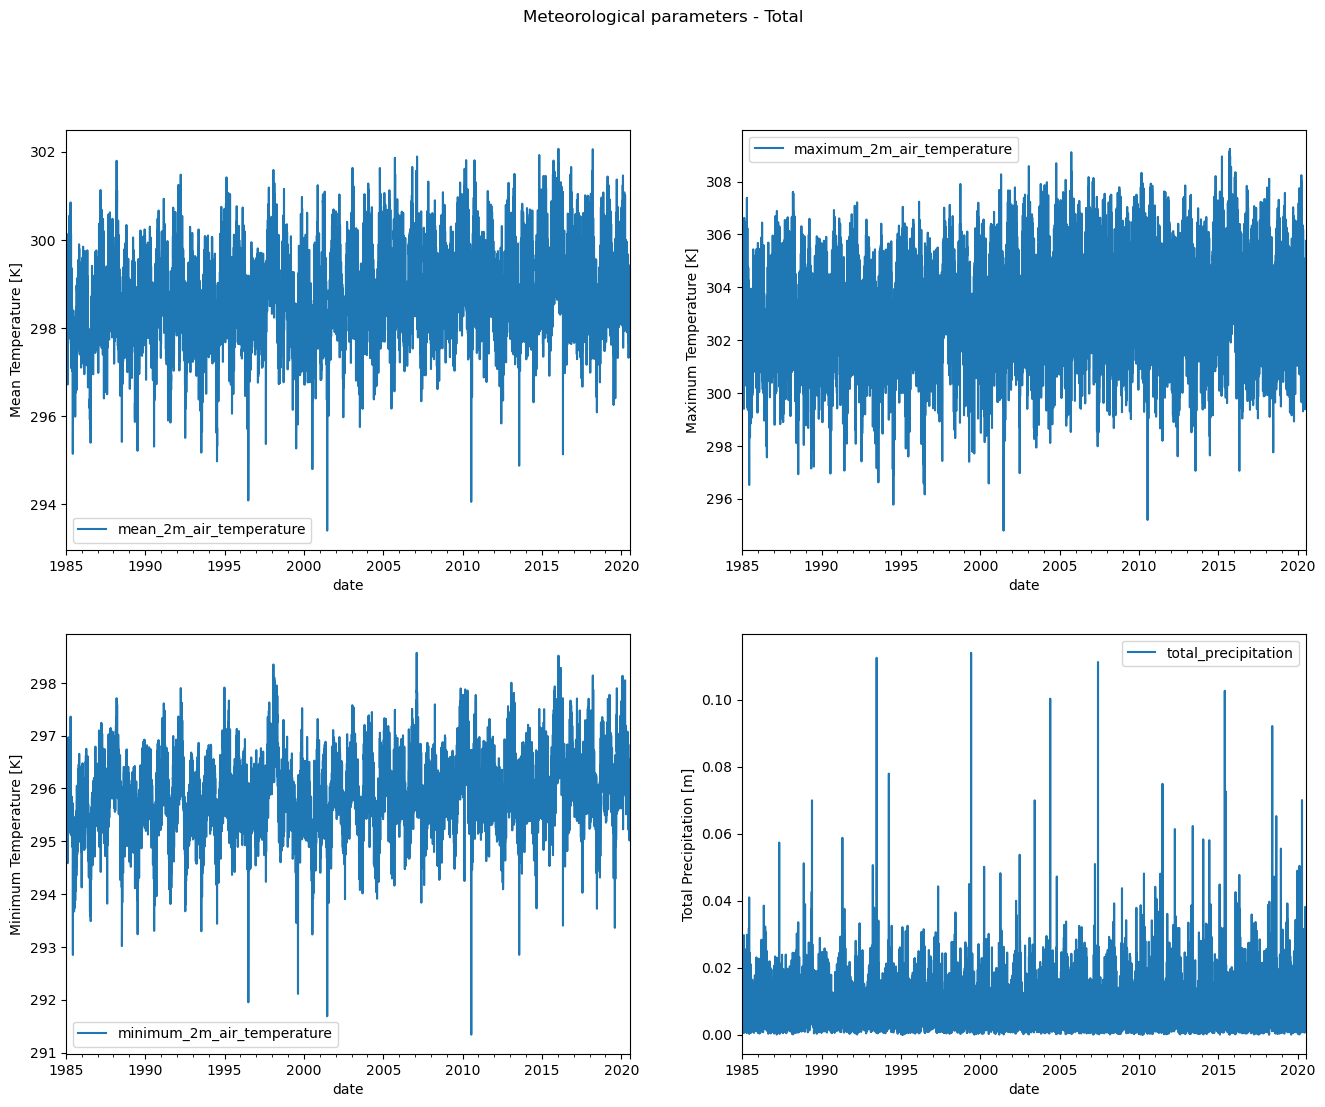

In [2]:
#Iterate and read all .csv data from ERA5
path = 'G:\Outros computadores/USP_PC/Pos_Doutorado/Avaliação_território_ComparacaoGases/Analises_GEE/Avaliacao_Areas_geometry/Sensibilidade/Area_2/50_50/'
print(path)

#print(path)
ERA5_Tot = pd.concat(map(pd.read_csv, glob.glob(path + "/*ERA5_DAILY_MAX_TEMP*.csv")))

print('Original data size = ', ERA5_Tot.size)

ERA5_Tot = ERA5_Tot.drop('system:index',axis = 1);
ERA5_Tot = ERA5_Tot.drop('.geo',axis = 1);
ERA5_Tot = ERA5_Tot.drop('system:time_end',axis = 1);

#Transforming seconds to datetime
#response = time.strftime('%m/%d/%y %H:%M:%S', time.gmtime(ERA5['system:time_start']))

x = ERA5_Tot['system:time_start'].astype(float)/1000#.astype('datetime64[ns]')

ERA5_Tot['date'] = pd.to_datetime(x,unit='s')
ERA5_Tot = ERA5_Tot.drop('system:time_start',axis = 1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

ERA5_Tot.plot(x = "date", y ="mean_2m_air_temperature",ax=axes[0,0]).set_ylabel('Mean Temperature [K]')
ERA5_Tot.plot(x = "date", y ="maximum_2m_air_temperature", ax=axes[0,1]).set_ylabel('Maximum Temperature [K]')
ERA5_Tot.plot(x = "date", y ="minimum_2m_air_temperature",ax=axes[1,0]).set_ylabel('Minimum Temperature [K]')
ERA5_Tot.plot(x = "date", y ="total_precipitation",ax=axes[1,1]).set_ylabel('Total Precipitation [m]')

plt.suptitle("Meteorological parameters - Total ")
plt.show()




date
1      9.197658
2      9.120126
3     10.738935
4     11.543312
5     12.638436
6     11.013368
7      8.419680
8      6.433301
9      5.985967
10     6.660788
11     7.659096
12     8.417585
Name: total_precipitation, dtype: float64
[2, 3, 4, 5]
[7, 8, 9, 10]
Wet Season: 3 to 6
Dry Season: 8 to 11


C:\Users\Marco\AppData\Local\Temp\ipykernel_10180\2200952806.py:60: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ERA5medTotal_Tot = ERA5_Tot.groupby(ERA5_Tot.date.dt.year).mean()
C:\Users\Marco\AppData\Local\Temp\ipykernel_10180\2200952806.py:64: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ERA5medWet_Tot = ERA5wet_Tot.groupby(ERA5wet_Tot.date.dt.year).mean()
C:\Users\Marco\AppData\Local\Temp\ipykernel_10180\2200952806.py:67: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or selec

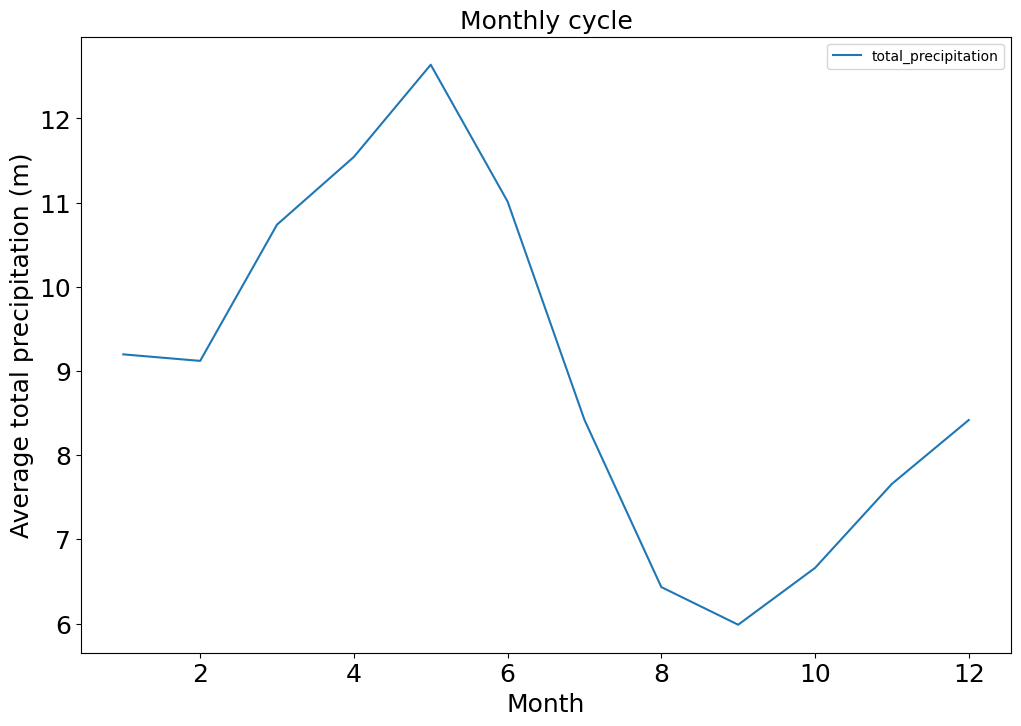

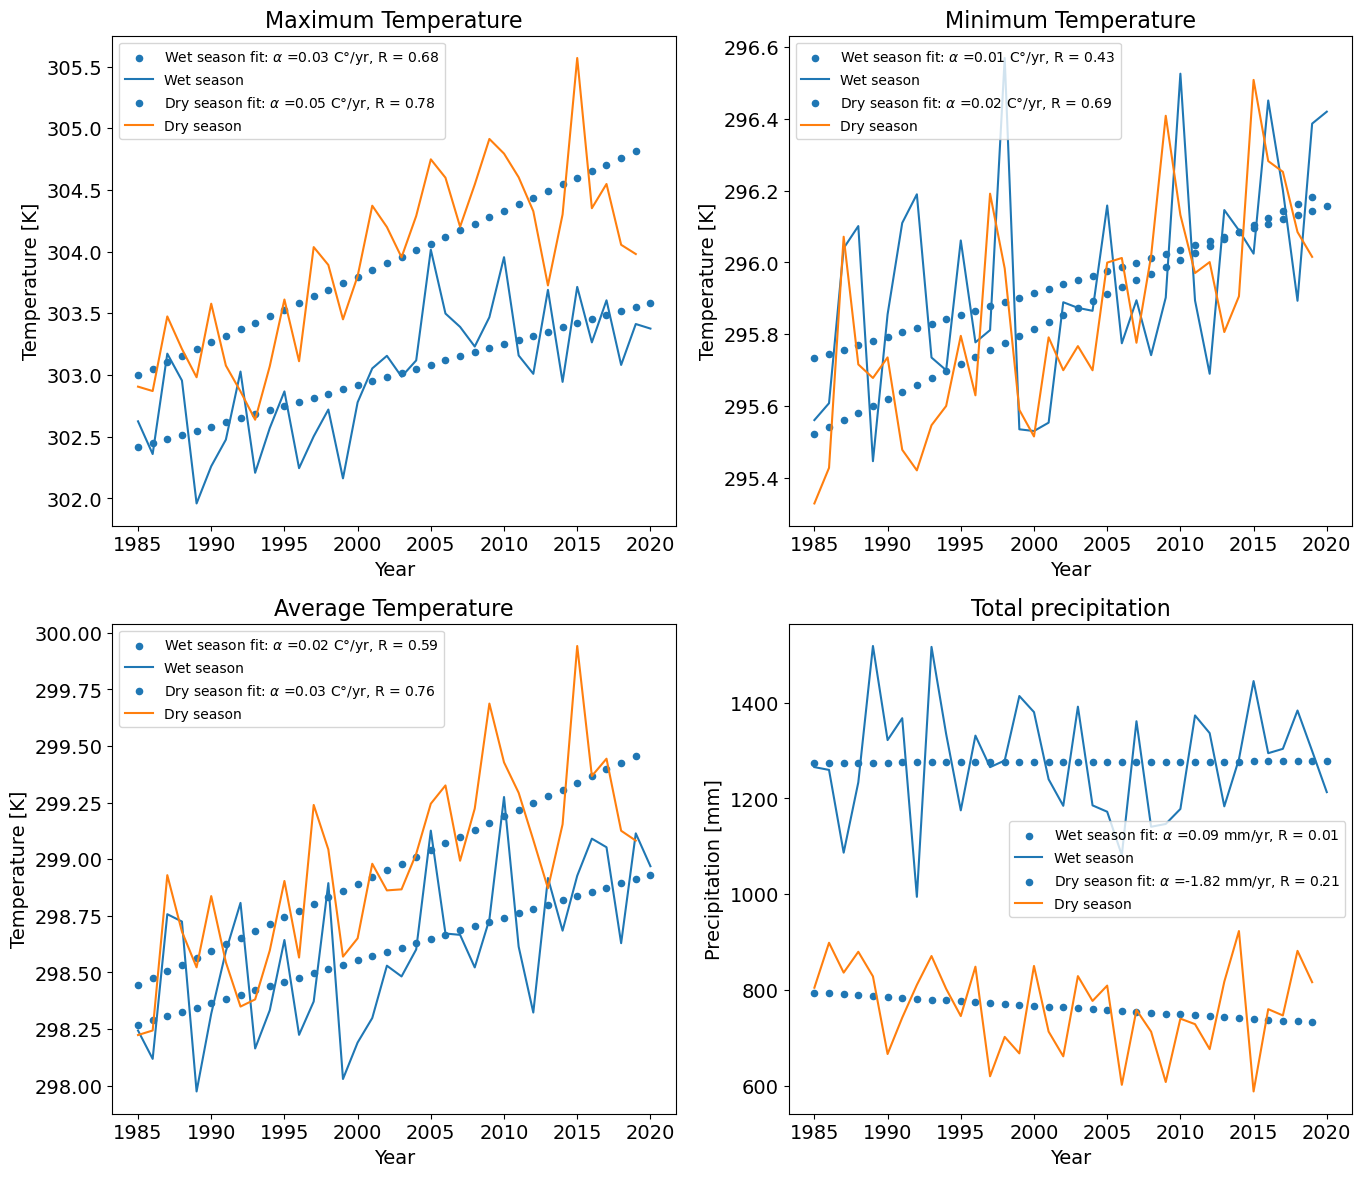

C:\Users\Marco\AppData\Local\Temp\ipykernel_10180\2200952806.py:252: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GPMmedWet = GPM_wet.groupby(GPM_wet.date.dt.year).mean()
C:\Users\Marco\AppData\Local\Temp\ipykernel_10180\2200952806.py:253: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GPMmedDry = GPM_dry.groupby(GPM_dry.date.dt.year).mean()
C:\Users\Marco\AppData\Local\Temp\ipykernel_10180\2200952806.py:254: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

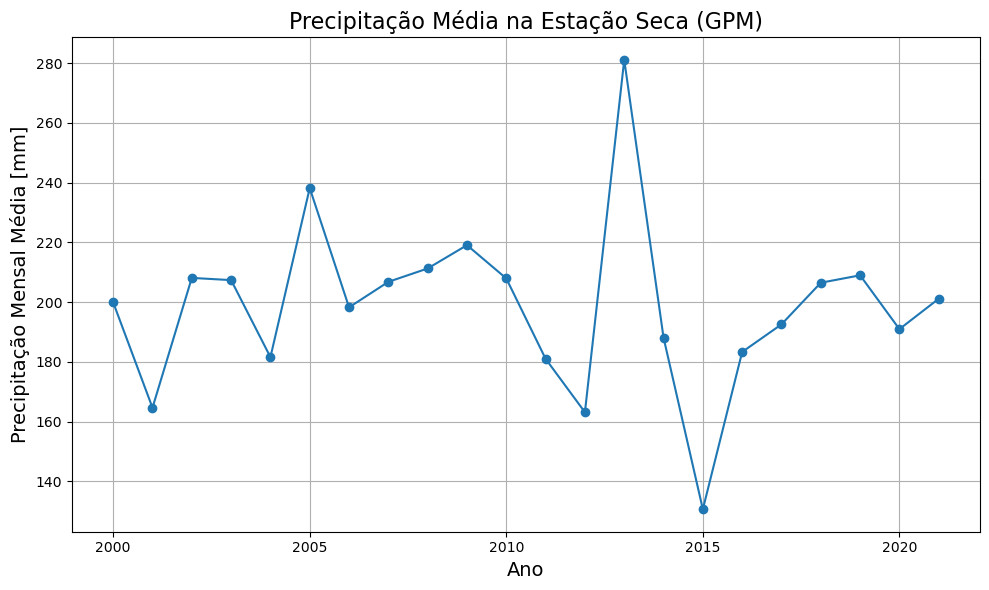

In [70]:
#Separating wet and dry seasons
### Total area - 3

ERA5_Tot['month'] = pd.DatetimeIndex(ERA5_Tot['date']).month

#Calculating the sum of precipitation for each month, for each year...
#Precipitacao acumulada
ERA5SumPrec_Tot = ERA5_Tot["total_precipitation"].groupby(ERA5_Tot.date.dt.year).sum()

ERA5SumPrecMonth_Tot = ERA5_Tot["total_precipitation"].groupby(ERA5_Tot.date.dt.month).sum()
print(ERA5SumPrecMonth_Tot)

plt.figure(figsize=(12, 8))
ax = ERA5SumPrecMonth_Tot.plot(x = "date", fontsize=18)
ax.set_ylabel('Average total precipitation (m)', fontsize=18)
ax.set_xlabel('Month', fontsize=18)
ax.set_title('Monthly cycle', fontsize=18)
plt.legend()

#Statistical determination of wet and dry seasons

wet = np.quantile(ERA5SumPrecMonth_Tot, .70)
dry = np.quantile(ERA5SumPrecMonth_Tot, .30)

indWet = [i for i,v in enumerate(ERA5SumPrecMonth_Tot) if v >= wet]
indDry = [i for i,v in enumerate(ERA5SumPrecMonth_Tot) if v <= dry]

m1_1 = min(indWet) + 1
m1_2 = max(indWet) + 1

print(indWet)
print(indDry)

if max(indWet) > 9:
    #print(indWet[len(indWet)-2])
    m1_2 = indWet[len(indWet)-2] + 1


m2_1 = min(indDry) + 1
m2_2 = max(indDry) + 1

print('Wet Season: ' + str(m1_1) + ' to ' + str(m1_2))
print('Dry Season: ' + str(m2_1) + ' to ' + str(m2_2))

#print(ERA5_Tot)

ERA5wet_Tot = ERA5_Tot.query('month >= @m1_1 & month <= @m1_2')
ERA5dry_Tot = ERA5_Tot.query('month >= @m2_1 & month <= @m2_2')

#ERA5wet_Tot = ERA5_Tot.query('month >= 1 & month <= 3')
#ERA5dry_Tot = ERA5_Tot.query('month >= 6 & month <= 9') #- Este eh o caso da area 17

#ERA5dry_Tot = ERA5_Tot.query('month > 0 & month <3') #- Este eh o caso da area 17
#ERA5dry_Tot = ERA5_Tot.query('month > 5 & month <10') #- Este eh o caso da area 6

ERA5SumPrecWet_Tot = ERA5wet_Tot["total_precipitation"].groupby(ERA5wet_Tot.date.dt.year).sum()
ERA5SumPrecDry_Tot = ERA5dry_Tot["total_precipitation"].groupby(ERA5dry_Tot.date.dt.year).sum()

#Averages - Total data
ERA5medTotal_Tot = ERA5_Tot.groupby(ERA5_Tot.date.dt.year).mean()

ERA5medTotal_Tot["total_precipitation"] = ERA5SumPrec_Tot*1000

ERA5medWet_Tot = ERA5wet_Tot.groupby(ERA5wet_Tot.date.dt.year).mean()
ERA5medWet_Tot["total_precipitation"] = ERA5SumPrecWet_Tot*1000

ERA5medDry_Tot = ERA5dry_Tot.groupby(ERA5dry_Tot.date.dt.year).mean()
ERA5medDry_Tot["total_precipitation"] = ERA5SumPrecDry_Tot*1000

ERA5medWet_Tot.drop("month", axis = 1);
ERA5medDry_Tot.drop("month", axis = 1);

###Linear Models between the meteorological matrices
###Total area 3

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
#####Tmax
dt = ERA5medWet_Tot["maximum_2m_air_temperature"]
x = dt.index.values.reshape(-1, 1)
y = dt.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
y_pred = regr.predict(x)
coefw = round(float(regr.coef_[0]),2)
r2w = round(np.sqrt(regr.score(x, y)),2) #Pearson Coeff. I decided to keep it like R, not R2.

dpredTmaxWet_Tot = pd.DataFrame(np.concatenate([x,y_pred],axis=1), columns = ['date','pred'])

dpredTmaxWet_Tot.plot.scatter(x = "date" ,y = "pred", ax=axes[0,0])
ERA5medWet_Tot.plot(y = "maximum_2m_air_temperature", ax=axes[0,0], fontsize=14)

dt = ERA5medDry_Tot["maximum_2m_air_temperature"]
x = dt.index.values.reshape(-1, 1)
y = dt.values.reshape(-1, 1)
regr.fit(x,y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
y_pred = regr.predict(x)
coefd = round(float(regr.coef_[0]),2)
r2d = round(np.sqrt(regr.score(x, y)),2)

dpredTmaxDry_Tot = pd.DataFrame(np.concatenate([x,y_pred],axis=1), columns = ['date','pred'])

dpredTmaxDry_Tot.plot.scatter(x = "date" ,y = "pred", ax=axes[0,0])
ERA5medDry_Tot.plot(y = "maximum_2m_air_temperature", ax=axes[0,0])

axes[0, 0].set_title('Maximum Temperature', fontsize=16)
axes[0,0].legend(['Wet season fit: ' r'$\alpha$ =' f'{coefw} C°/yr, R = {r2w}',
                  'Wet season','Dry season fit: ' r'$\alpha$ =' f'{coefd} C°/yr, R = {r2d}', 'Dry season'])
axes[0,0].set_ylabel('Temperature [K]', fontsize=14)
axes[0,0].set_xlabel('Year', fontsize=14)

#####Tmin
dt = ERA5medWet_Tot["minimum_2m_air_temperature"]
x = dt.index.values.reshape(-1, 1)
y = dt.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
y_pred = regr.predict(x)
#print(f'r_sqr value: {regr.score(x, y)}')
coefw = round(float(regr.coef_[0]),2)
r2w = round(np.sqrt(regr.score(x, y)),2)

dpredTminWet_Tot = pd.DataFrame(np.concatenate([x,y_pred],axis=1), columns = ['date','pred'])

dpredTminWet_Tot.plot.scatter(x = "date" ,y = "pred", ax=axes[0,1])
ERA5medWet_Tot.plot(y = "minimum_2m_air_temperature", ax=axes[0,1], fontsize=14)

dt = ERA5medDry_Tot["minimum_2m_air_temperature"]
x = dt.index.values.reshape(-1, 1)
y = dt.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
y_pred = regr.predict(x)
#print(f'r_sqr value: {regr.score(x, y)}')
coefd = round(float(regr.coef_[0]),2)
r2d = round(np.sqrt(regr.score(x, y)),2)

dpredTminDry_Tot = pd.DataFrame(np.concatenate([x,y_pred],axis=1), columns = ['date','pred'])

dpredTminDry_Tot.plot.scatter(x = "date" ,y = "pred", ax=axes[0,1])
ERA5medDry_Tot.plot(y = "minimum_2m_air_temperature", ax=axes[0,1])

axes[0, 1].set_title('Minimum Temperature', fontsize=16)
axes[0,1].legend(['Wet season fit: ' r'$\alpha$ =' f'{coefw} C°/yr, R = {r2w}',
                  'Wet season','Dry season fit: ' r'$\alpha$ =' f'{coefd} C°/yr, R = {r2d}', 'Dry season'])
axes[0,1].set_ylabel('Temperature [K]', fontsize=14)
axes[0,1].set_xlabel('Year', fontsize=14)

#####Tmed
dt = ERA5medWet_Tot["mean_2m_air_temperature"]
x = dt.index.values.reshape(-1, 1)
y = dt.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
y_pred = regr.predict(x)
#print(f'r_sqr value: {regr.score(x, y)}')
coefw = round(float(regr.coef_[0]),2)
r2w = round(np.sqrt(regr.score(x, y)),2)

dpredTavgWet_Tot = pd.DataFrame(np.concatenate([x,y_pred],axis=1), columns = ['date','pred'])

dpredTavgWet_Tot.plot.scatter(x = "date" ,y = "pred", ax=axes[1,0])
ERA5medWet_Tot.plot(y = "mean_2m_air_temperature", ax=axes[1,0], fontsize=14)

dt = ERA5medDry_Tot["mean_2m_air_temperature"]
x = dt.index.values.reshape(-1, 1)
y = dt.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
y_pred = regr.predict(x)
#print(f'r_sqr value: {regr.score(x, y)}')
coefd = round(float(regr.coef_[0]),2)
r2d = round(np.sqrt(regr.score(x, y)),2)

dpredTavgDry_Tot = pd.DataFrame(np.concatenate([x,y_pred],axis=1), columns = ['date','pred'])

dpredTavgDry_Tot.plot.scatter(x = "date" ,y = "pred", ax=axes[1,0])
ERA5medDry_Tot.plot(y = "mean_2m_air_temperature", ax=axes[1,0])

axes[1, 0].set_title('Average Temperature', fontsize=16)
axes[1,0].legend(['Wet season fit: ' r'$\alpha$ =' f'{coefw} C°/yr, R = {r2w}',
                  'Wet season','Dry season fit: ' r'$\alpha$ =' f'{coefd} C°/yr, R = {r2d}', 'Dry season'])
axes[1,0].set_ylabel('Temperature [K]', fontsize=14)
axes[1,0].set_xlabel('Year', fontsize=14)

#####Precip Total
dt = ERA5medWet_Tot["total_precipitation"]
x = dt.index.values.reshape(-1, 1)
y = dt.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
y_pred = regr.predict(x)
#print(f'r_sqr value: {regr.score(x, y)}')
coefw = round(float(regr.coef_[0]),2)
r2w = round(np.sqrt(regr.score(x, y)),2)

dpredPrecWet_Tot = pd.DataFrame(np.concatenate([x,y_pred],axis=1), columns = ['date','pred'])

dpredPrecWet_Tot.plot.scatter(x = "date" ,y = "pred", ax=axes[1,1])
ERA5medWet_Tot.plot(y = "total_precipitation", ax=axes[1,1], fontsize=14)

dt = ERA5medDry_Tot["total_precipitation"]
x = dt.index.values.reshape(-1, 1)
y = dt.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
y_pred = regr.predict(x)
#print(f'r_sqr value: {regr.score(x, y)}')
coefd = round(float(regr.coef_[0]),2)
r2d = round(np.sqrt(regr.score(x, y)),2)

dpredPrecDry_Tot = pd.DataFrame(np.concatenate([x,y_pred],axis=1), columns = ['date','pred'])

dpredPrecDry_Tot.plot.scatter(x = "date" ,y = "pred", ax=axes[1,1]).legend(['Wet season fit', 'Wet season','Dry season fit', 'Dry season'])
ERA5medDry_Tot.plot(y = "total_precipitation", ax=axes[1,1]).set_ylabel('Total precipitation [mm]', fontsize=14)

axes[1, 1].set_title('Total precipitation', fontsize=16)
axes[1,1].legend(['Wet season fit: ' r'$\alpha$ =' f'{coefw} mm/yr, R = {r2w}',
                  'Wet season','Dry season fit: ' r'$\alpha$ =' f'{coefd} mm/yr, R = {r2d}', 'Dry season'])
axes[1,1].set_ylabel('Precipitation [mm]', fontsize=14)
axes[1,1].set_xlabel('Year', fontsize=14)

plt.show()


###############GPM

GPM = pd.read_csv(path + "GPM_MONTHLY_PRECIP.csv", sep= ',', usecols= ["system:index","precip_mm_month"]) 

GPM['date'] = pd.to_datetime(GPM['system:index'], format='%Y%m%d%H%M%S')

GPM['month'] = pd.DatetimeIndex(GPM['date']).month

GPM_wet = GPM.query('month >= @m1_1 & month <= @m1_2')
GPM_dry = GPM.query('month >= @m2_1 & month <= @m2_2')

GPMmedWet = GPM_wet.groupby(GPM_wet.date.dt.year).mean()
GPMmedDry = GPM_dry.groupby(GPM_dry.date.dt.year).mean()
GPMmedTot = GPM.groupby(GPM.date.dt.year).mean()


# Certifique-se de que o índice é o ano
GPMmedDry.index.name = 'Year'

# Plot
plt.figure(figsize=(10, 6))
plt.plot(GPMmedDry.index, GPMmedDry['precip_mm_month'], marker='o', linestyle='-')
plt.title('Precipitação Média na Estação Seca (GPM)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Precipitação Mensal Média [mm]', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
ERA5medDry_Tot.to_csv("G:\Outros computadores/USP_PC/Pos_Doutorado/Avaliação_território_ComparacaoGases/Analises_GEE/Avaliacao_Areas_geometry/Sensibilidade/Area_2/50_50/ERA5medDry_Tot_50_50.csv", index=True)
GPMmedDry.to_csv("G:\Outros computadores/USP_PC/Pos_Doutorado/Avaliação_território_ComparacaoGases/Analises_GEE/Avaliacao_Areas_geometry/Sensibilidade/Area_2/50_50/GPMmedDry_50_50.csv", index=True)


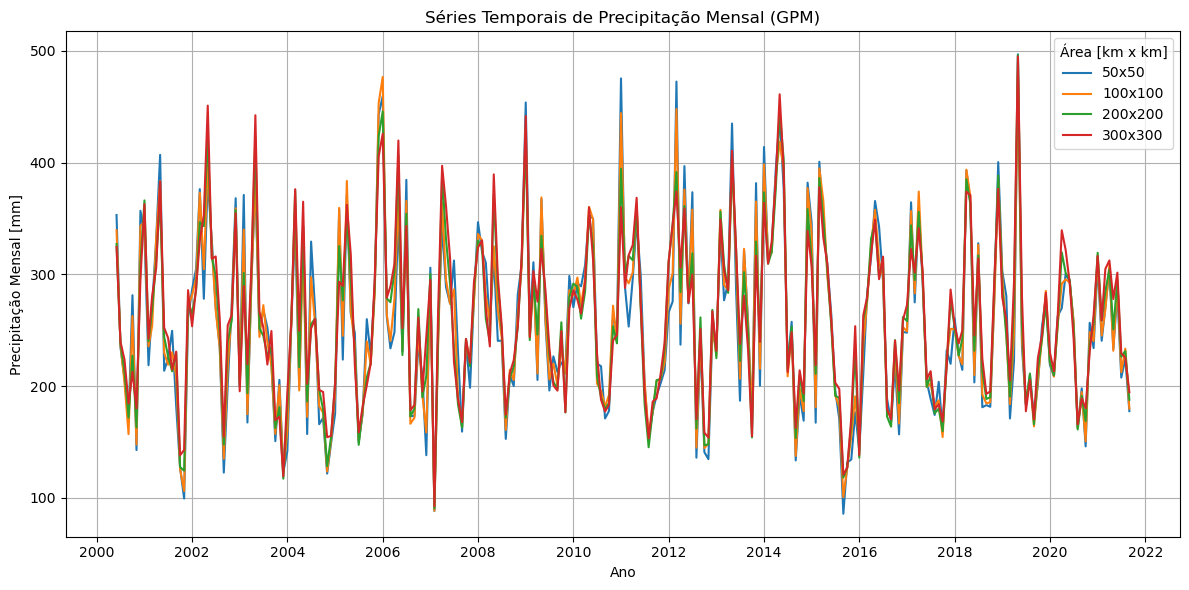

In [3]:

# Caminho principal - GPM
base_path = r'G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_Areas_geometry\Sensibilidade\Area_2'

# Subpastas a considerar
folders = ['50_50', '100_100', '200_200', '300_300']

# Inicializa o plot
plt.figure(figsize=(12, 6))

# Loop sobre as pastas
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    file_path = os.path.join(folder_path, 'GPM_MONTHLY_PRECIP.csv')
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Converte a coluna 'system:index' para datetime
        if 'system:index' in df.columns:
            df['date'] = pd.to_datetime(df['system:index'], format='%Y%m%d%H%M%S')
        else:
            print(f'Coluna "system:index" não encontrada em: {file_path}')
            continue
        
        # Plot da precipitação mensal
        plt.plot(df['date'], df['precip_mm_month'], label=folder.replace('_', 'x'))
    else:
        print(f'Arquivo não encontrado: {file_path}')

# Formatação do eixo X para exibir apenas os anos
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Marca a cada 2 anos
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Ano')
plt.ylabel('Precipitação Mensal [mm]')
plt.title('Séries Temporais de Precipitação Mensal (GPM)')
plt.legend(title='Área [km x km]')
plt.grid(True)
plt.tight_layout()
plt.show()


# Daqui para baixo, sao comparacoes do que foi exportado acima

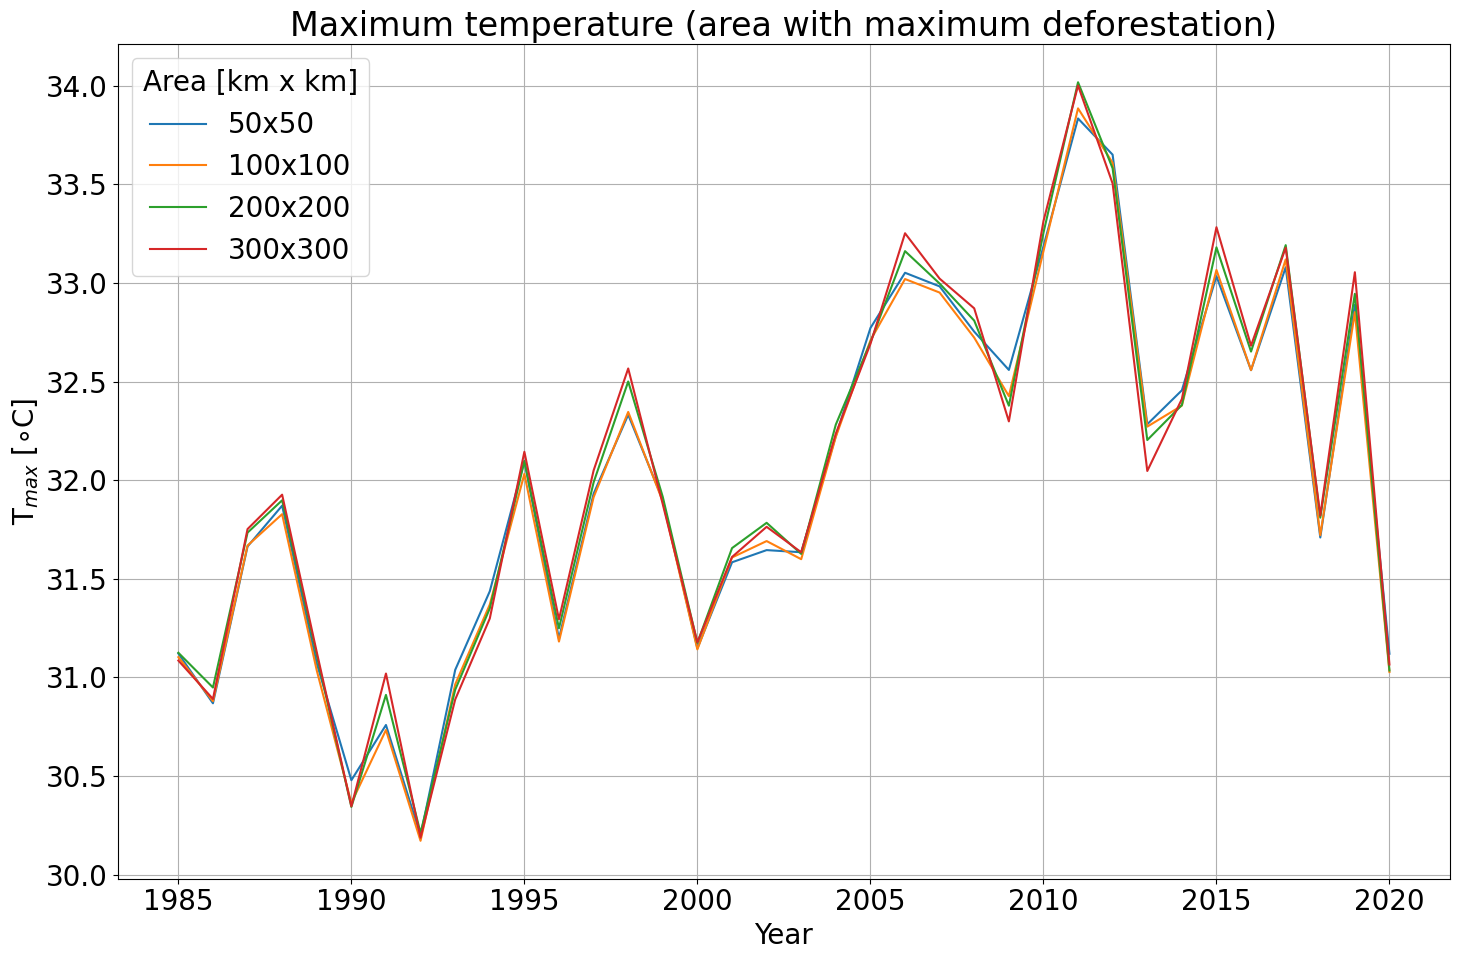

In [15]:
# Caminho principal
base_path = r'G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_Areas_geometry\Sensibilidade\Area_1'

# Subpastas a considerar
folders = ['50_50', '100_100', '200_200', '300_300']

# Inicializa o plot
plt.figure(figsize=(15, 10))

plt.rcParams.update({'font.size': 20})

# Loop sobre as pastas
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    filename = f'ERA5medDry_Tot_{folder}.csv'
    file_path = os.path.join(folder_path, filename)
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Corrige: se a coluna 'date' contiver apenas o ano, crie uma data no formato 'YYYY-01-01'
        df['date'] = pd.to_datetime(df['date'].astype(str) + '-01-01')
        
        temp = df['maximum_2m_air_temperature'] - 273.15 
        
        # Plot da temperatura máxima
        plt.plot(df['date'], temp, label=folder.replace('_', 'x'))
    else:
        print(f'Arquivo não encontrado: {file_path}')

# Formatação do eixo X para exibir apenas os anos
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Marca a cada 5 anos
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Year')
plt.ylabel(r'T$_{max}$ [$\circ$C]')
plt.title('Maximum temperature (area with maximum deforestation)')
plt.legend(title='Area [km x km]')
plt.grid(True)
plt.tight_layout()
plt.show()



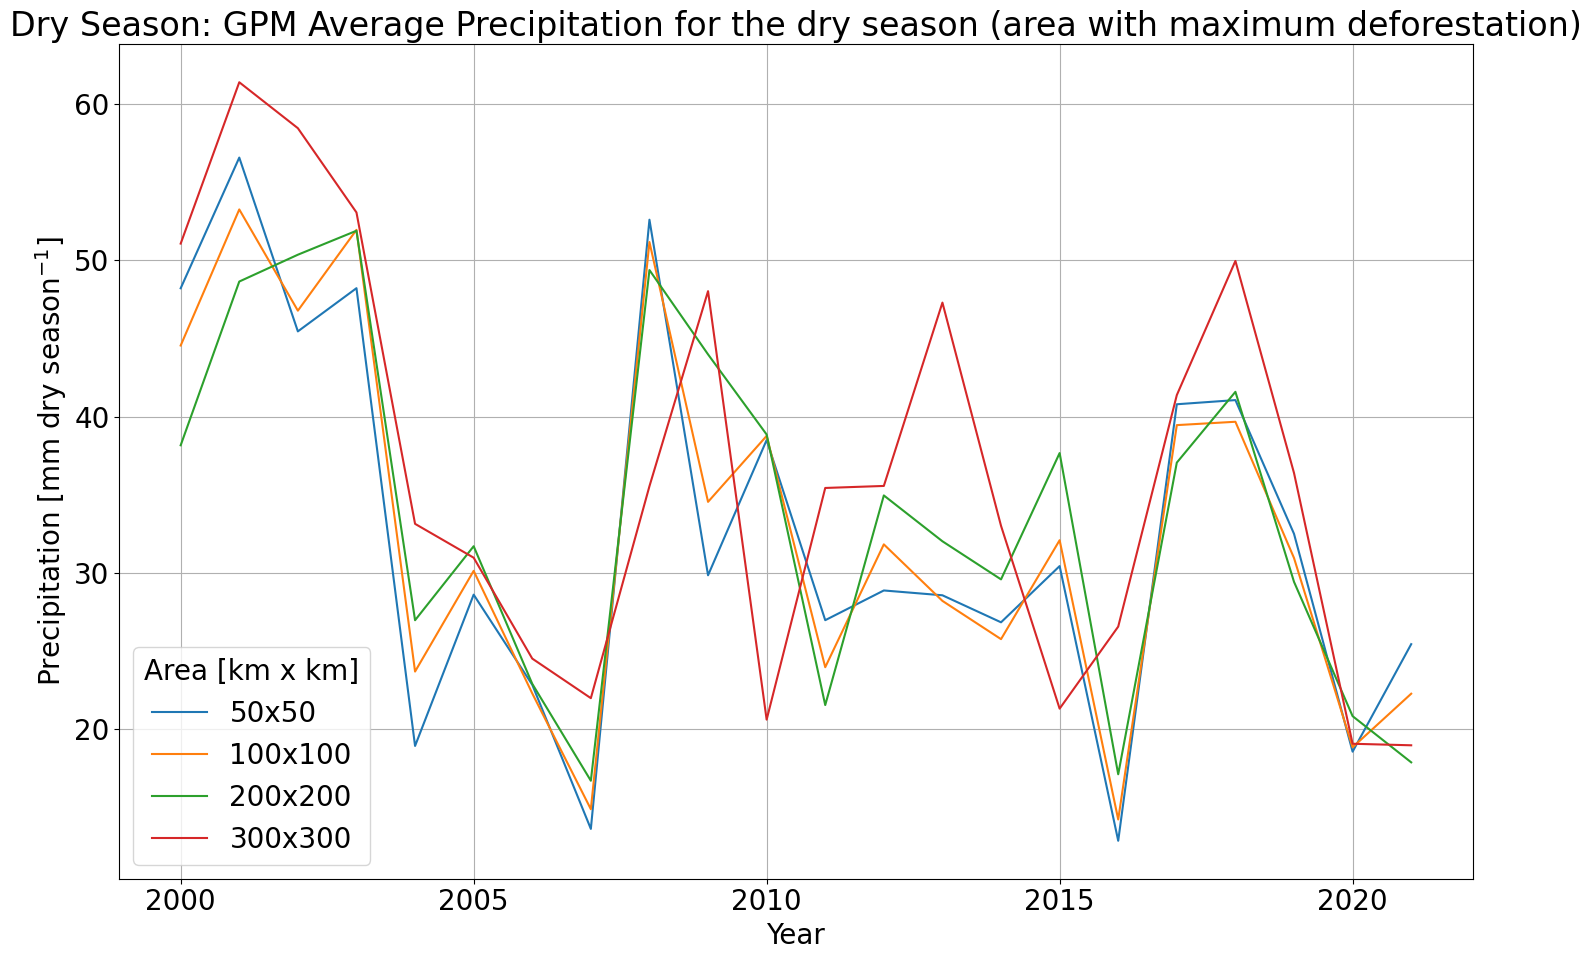

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Caminho principal
base_path = r'G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_Areas_geometry\Sensibilidade\Area_1'

# Subpastas
folders = ['50_50', '100_100', '200_200', '300_300']

# Inicializa a figura do gráfico
plt.figure(figsize=(15, 10))

# Loop pelas pastas e arquivos GPMmedDry
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    filename = f'GPMmedDry_{folder}.csv'
    file_path = os.path.join(folder_path, filename)

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        # Verifica se há a coluna correta e trata a data
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date']) 
            df['year'] = df['date'].dt.year
        else:
            df['year'] = df.index  # assume que o índice é o ano

        plt.plot(df['Year'], df['precip_mm_month'], label=folder.replace('_', 'x'))
    else:
        print(f'[MISSING] {file_path}')

# Personalização do gráfico
plt.xlabel('Year')
plt.ylabel('Precipitation [mm dry season$^{-1}$]')
plt.title('Dry Season: GPM Average Precipitation for the dry season (area with maximum deforestation)')
plt.legend(title='Area [km x km]')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
df

,Year,system:index,precip_mm_month,month,year
0,2000,2.000095e+13,200.341918,9.5,0
1,2001,2.001095e+13,181.759819,9.5,1
2,2002,2.002095e+13,233.261883,9.5,2
3,2003,2.003095e+13,202.788837,9.5,3
4,2004,2.004095e+13,201.528807,9.5,4
5,2005,2.005095e+13,225.186126,9.5,5
6,2006,2.006095e+13,204.611238,9.5,6
7,2007,2.007095e+13,204.834826,9.5,7
8,2008,2.008095e+13,215.741455,9.5,8
9,2009,2.009095e+13,205.698562,9.5,9


In [75]:
# Caminho principal
base_path = r'G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_Areas_geometry\Sensibilidade\Area_1'

# Subpastas
folders = ['50_50', '100_100', '200_200', '300_300']

# Dicionário para armazenar os DataFrames combinados
combined_data = {}

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    
    # Arquivos
    meteo_filename = f'ERA5medDry_Tot_{folder}.csv'
    forest_filename = f'fraction_Floresta_{folder}.csv'
    
    meteo_path = os.path.join(folder_path, meteo_filename)
    forest_path = os.path.join(folder_path, forest_filename)

    print(f'\n--- Verificando pasta {folder} ---')
    print(f'Meteorológico: {meteo_path} {"[OK]" if os.path.exists(meteo_path) else "[MISSING]"}')
    print(f'Floresta:      {forest_path} {"[OK]" if os.path.exists(forest_path) else "[MISSING]"}')

    if os.path.exists(meteo_path) and os.path.exists(forest_path):
        # Ler dados meteorológicos
        meteo_df = pd.read_csv(meteo_path)
        meteo_df['date'] = pd.to_datetime(meteo_df['date'].astype(str) + '-01-01')

        # Ler dados de floresta sem usar índice
        forest_df = pd.read_csv(forest_path, index_col=False)

        # Detectar a coluna de porcentagem automaticamente
        colunas = forest_df.columns.tolist()
        if 'system:index' in colunas and len(colunas) >= 2:
            percent_col = [col for col in colunas if col != 'system:index'][0]  # pega a primeira que não é o índice
            forest_df = forest_df.rename(columns={percent_col: 'Percent'})
        else:
            raise ValueError(f'Formato inesperado no arquivo: {forest_path}. Colunas: {colunas}')

        # Criar coluna de ano
        forest_df['year'] = forest_df['system:index'].astype(int) + 1985

        # Selecionar apenas as colunas relevantes
        forest_df = forest_df[['year', 'Percent']]

        # Mesclar os dados com base no ano
        meteo_df['year'] = meteo_df['date'].dt.year
        merged_df = pd.merge(meteo_df, forest_df, on='year', how='left')

        # Armazenar
        combined_data[folder] = merged_df

# Exibir apenas se existir o dado da pasta
if '50_50' in combined_data:
    print("\nExemplo de dados da pasta 50_50:")
    print(combined_data['50_50'].head())
else:
    print("\nNenhum dado carregado para 50_50.")



--- Verificando pasta 50_50 ---
Meteorológico: G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_Areas_geometry\Sensibilidade\Area_1\50_50\ERA5medDry_Tot_50_50.csv [OK]
Floresta:      G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_Areas_geometry\Sensibilidade\Area_1\50_50\fraction_Floresta_50_50.csv [OK]

--- Verificando pasta 100_100 ---
Meteorológico: G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_Areas_geometry\Sensibilidade\Area_1\100_100\ERA5medDry_Tot_100_100.csv [OK]
Floresta:      G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_Areas_geometry\Sensibilidade\Area_1\100_100\fraction_Floresta_100_100.csv [OK]

--- Verificando pasta 200_200 ---
Meteorológico: G:\Outros computadores\USP_PC\Pos_Doutorado\Avaliação_território_ComparacaoGases\Analises_GEE\Avaliacao_

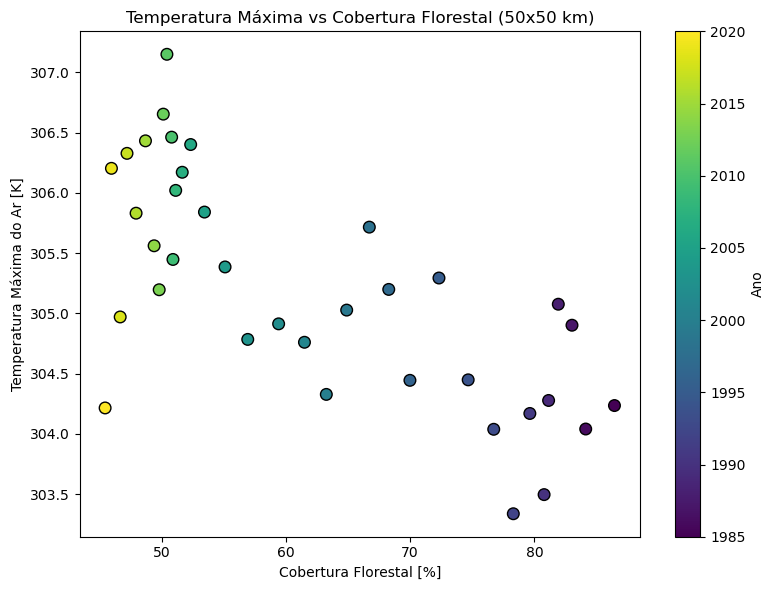

In [78]:
# Dados da área 50x50
df = combined_data['300_300']

# Criar o gráfico
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df['Percent'],
    df['maximum_2m_air_temperature'],
    c=df['year'],
    cmap='viridis',
    s=70,
    edgecolor='k'
)

# Títulos e eixos
plt.xlabel('Cobertura Florestal [%]')
plt.ylabel('Temperatura Máxima do Ar [K]')
plt.title('Temperatura Máxima vs Cobertura Florestal (50x50 km)')

# Barra de cores indicando o ano
cbar = plt.colorbar(scatter)
cbar.set_label('Ano')

# Mostrar
plt.tight_layout()
plt.show()